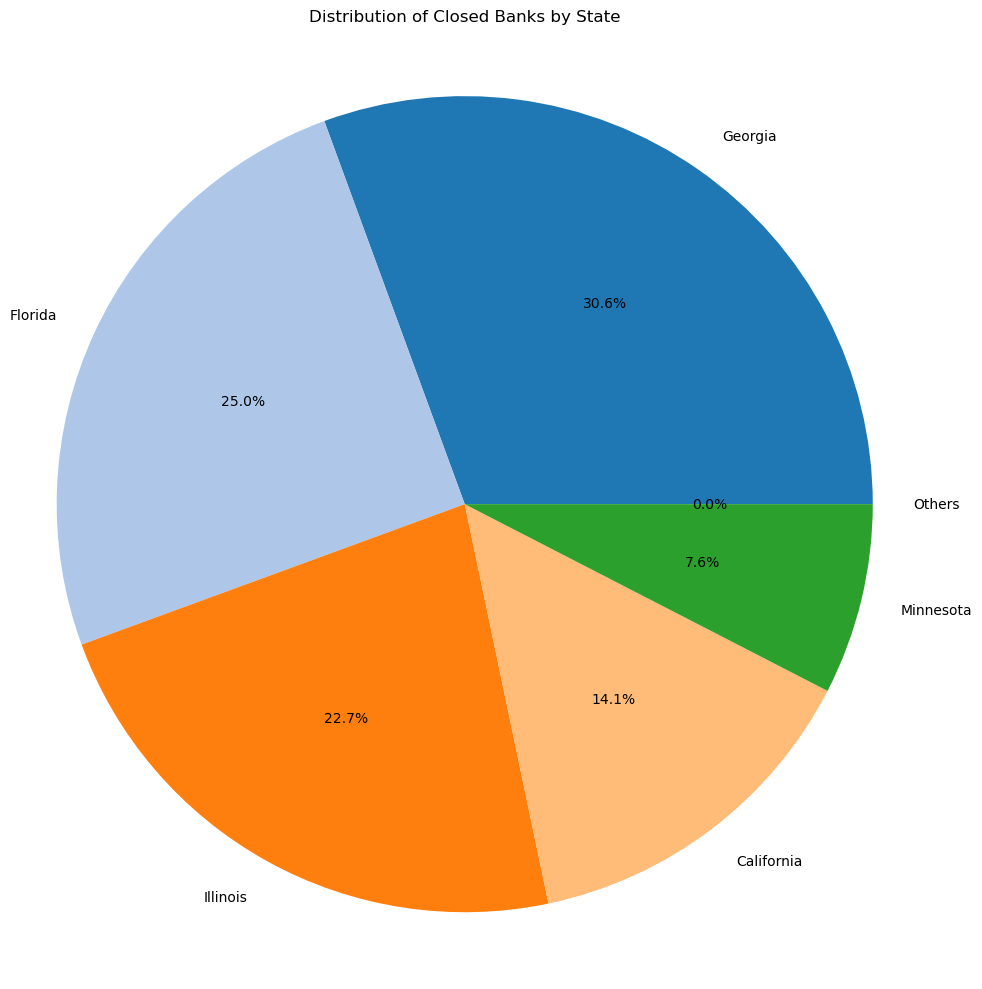

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

class visualisation:
    def number_of_closed_banks(self):
        # Load the dataset
        e = extract()
        date_closed_banks = e.fromCSV(file_path='data/banklist_date_closed_banks.csv')

        # Convert the list of dictionaries to a DataFrame for easier manipulation
        df = pd.DataFrame(date_closed_banks)

        # Convert the 'Closing Date' column to datetime format
        df['Closing Date'] = pd.to_datetime(df['Closing Date'], format='%d-%b-%y')

        # Group by year and count the number of closures
        df['Year'] = df['Closing Date'].dt.year
        closures_by_year = df.groupby('Year').size().reset_index(name='Count')

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(closures_by_year['Year'], closures_by_year['Count'], marker='o')
        plt.xlabel('Year')
        plt.ylabel('Number of Closed Banks')
        plt.title('Number of Closed Banks Over Time')
        plt.grid(True)
        plt.show()
        
    def banks_closed_per_state(self):
      # Load the dataset
        e = extract()
        state_closed_banks = e.fromCSV(file_path='data/banklist_state_closed_banks.csv')

        # Convert the list of dictionaries to a DataFrame for easier manipulation
        df = pd.DataFrame(state_closed_banks)

        # Sort by count in descending order (most frequent states first)
        state_counts = df['State Name'].value_counts().sort_values(ascending=False)

        # Select the top 5 states
        top_5_states = state_counts.head(5)

        # Calculate the total count excluding the top 5 states
        others_count = state_counts.iloc[5:].sum()

        # Combine the remaining states into a single category named "Others"
        state_counts = pd.concat([top_5_states, pd.Series([others_count], name='Others')])

        # Plotting
        plt.figure(figsize=(10, 10))  # Set the figure size for a square shape
        state_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)  # Use tab20 colormap for better differentiation
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.title('Distribution of Closed Banks by State')
        plt.ylabel('')  # Remove the y-label
        plt.tight_layout()
        plt.show()

    def banks_closed_per_acquiring_institution(self):
        # Load the dataset
        e = extract()
        acquiring_closed_banks = e.fromCSV(file_path='data/banklist_acquiring_closed_banks.csv')

        # Convert the list of dictionaries to a DataFrame for easier manipulation
        df = pd.DataFrame(acquiring_closed_banks)

        # Show only the top 10 acquiring banks (adjust as needed)
        acquiring_counts = df['Acquiring Institution'].value_counts().head(30)

        # Plotting with adjusted x-ticks
        plt.figure(figsize=(12, 6))  # Increase figure width to accommodate longer x-axis labels
        acquiring_counts.plot(kind='bar', color='skyblue')
        plt.xlabel('Acquiring Bank')
        plt.ylabel('Number of Closed Banks')
        plt.title('Top 10 Acquiring Banks by Number of Closed Banks')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()
        
v = visualisation()
# v.number_of_closed_banks()
v.banks_closed_per_state()
# v.banks_closed_per_acquiring_institution()